In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("PdM_telemetry.csv")

In [3]:
data

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [5]:
data.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [10]:
data.isnull().count()

datetime     876100
machineID    876100
volt         876100
rotate       876100
pressure     876100
vibration    876100
dtype: int64

In [12]:
#Calcul du nombre de valeurs manquantes dans le dataframe
count = 0
for column in data:
    if data.isnull().any == True:
        count += 1
print(count)

0


In [13]:
data.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

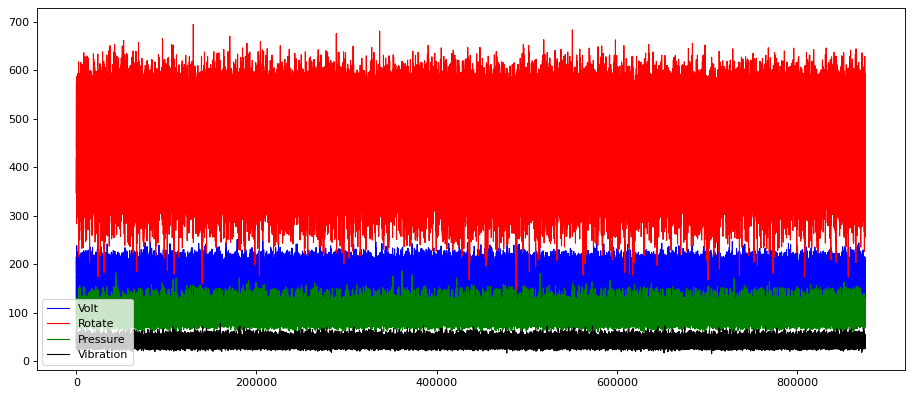

In [66]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(data.volt, label='Volt', color='blue', animated = True, linewidth=1)
ax.plot(data.rotate, label='Rotate', color='red', animated = True, linewidth=1)
ax.plot(data.pressure, label='Pressure', color='green', animated = True, linewidth=1)
ax.plot(data.vibration, label='Vibration', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
plt.show()

<AxesSubplot:xlabel='vibration'>

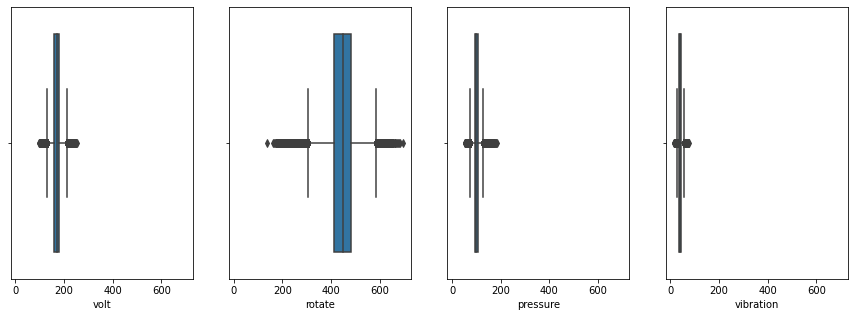

In [34]:
#Figures qui nous permettent de visualiser le comportement des variables
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(15,5))
sns.boxplot(ax = axes[0], x = data.volt)
sns.boxplot(ax = axes[1], x = data.rotate)
sns.boxplot(ax = axes[2], x = data.pressure)
sns.boxplot(ax = axes[3], x = data.vibration)

In [63]:
#Fonction qui permet de calculer les bornes inférieures et supérieures des quartiles
def abberations(df_column):
    q1 = df_column.quantile (q=0.25)
    q3 = df_column.quantile (q=0.75)
    ecart_quartile = q3 - q1
    borne_inf = q1 - 1.5 * ecart_quartile
    borne_sup = q1 + 1.5 * ecart_quartile
    return borne_inf,borne_sup

#Création du dataframe contenant les valeurs abérrantes pour toutes les variables
data_val_aberrantes = data[(data.volt < abberations(data.volt)[0]) | (data.volt > abberations(data.volt)[1])
                            | (data.rotate < abberations(data.rotate)[0]) | (data.rotate > abberations(data.rotate)[1])
                            | (data.pressure < abberations(data.pressure)[0]) | (data.pressure > abberations(data.pressure)[1])
                            | (data.vibration < abberations(data.vibration)[0]) | (data.vibration > abberations(data.vibration)[1])]
data_val_aberrantes.describe()

#Pourcentage de valeurs abérrantes par rapport à la taille du data set 
print(len(data_val_aberrantes)/len(data)*100)

33.64022371875357
